<a href="https://colab.research.google.com/github/Nautyy9/grocery_detection/blob/main/COMPLETE_GROCERY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri May 26 11:15:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 25.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display ,Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lMDIzDgw29dWnsEzRCfr")
project = rf.workspace("besuccessfull-cnwgw").project("grocery-detection-a4z5k")
dataset = project.version(4).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=6f15f6ad45b744c1762626660ab51c87310f52be89063b748f0cc09b73e48f09
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to grocery-detection-4 in yolov8:: 100%|██████████| 698/698 [00:00<00:00, 3153.89it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/grocery-detection-4/data.yaml epochs=100 imgsz=640
#go for direct path rather than dataset.location

100% 49.7M/49.7M [00:00<00:00, 156MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/grocery-detection-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

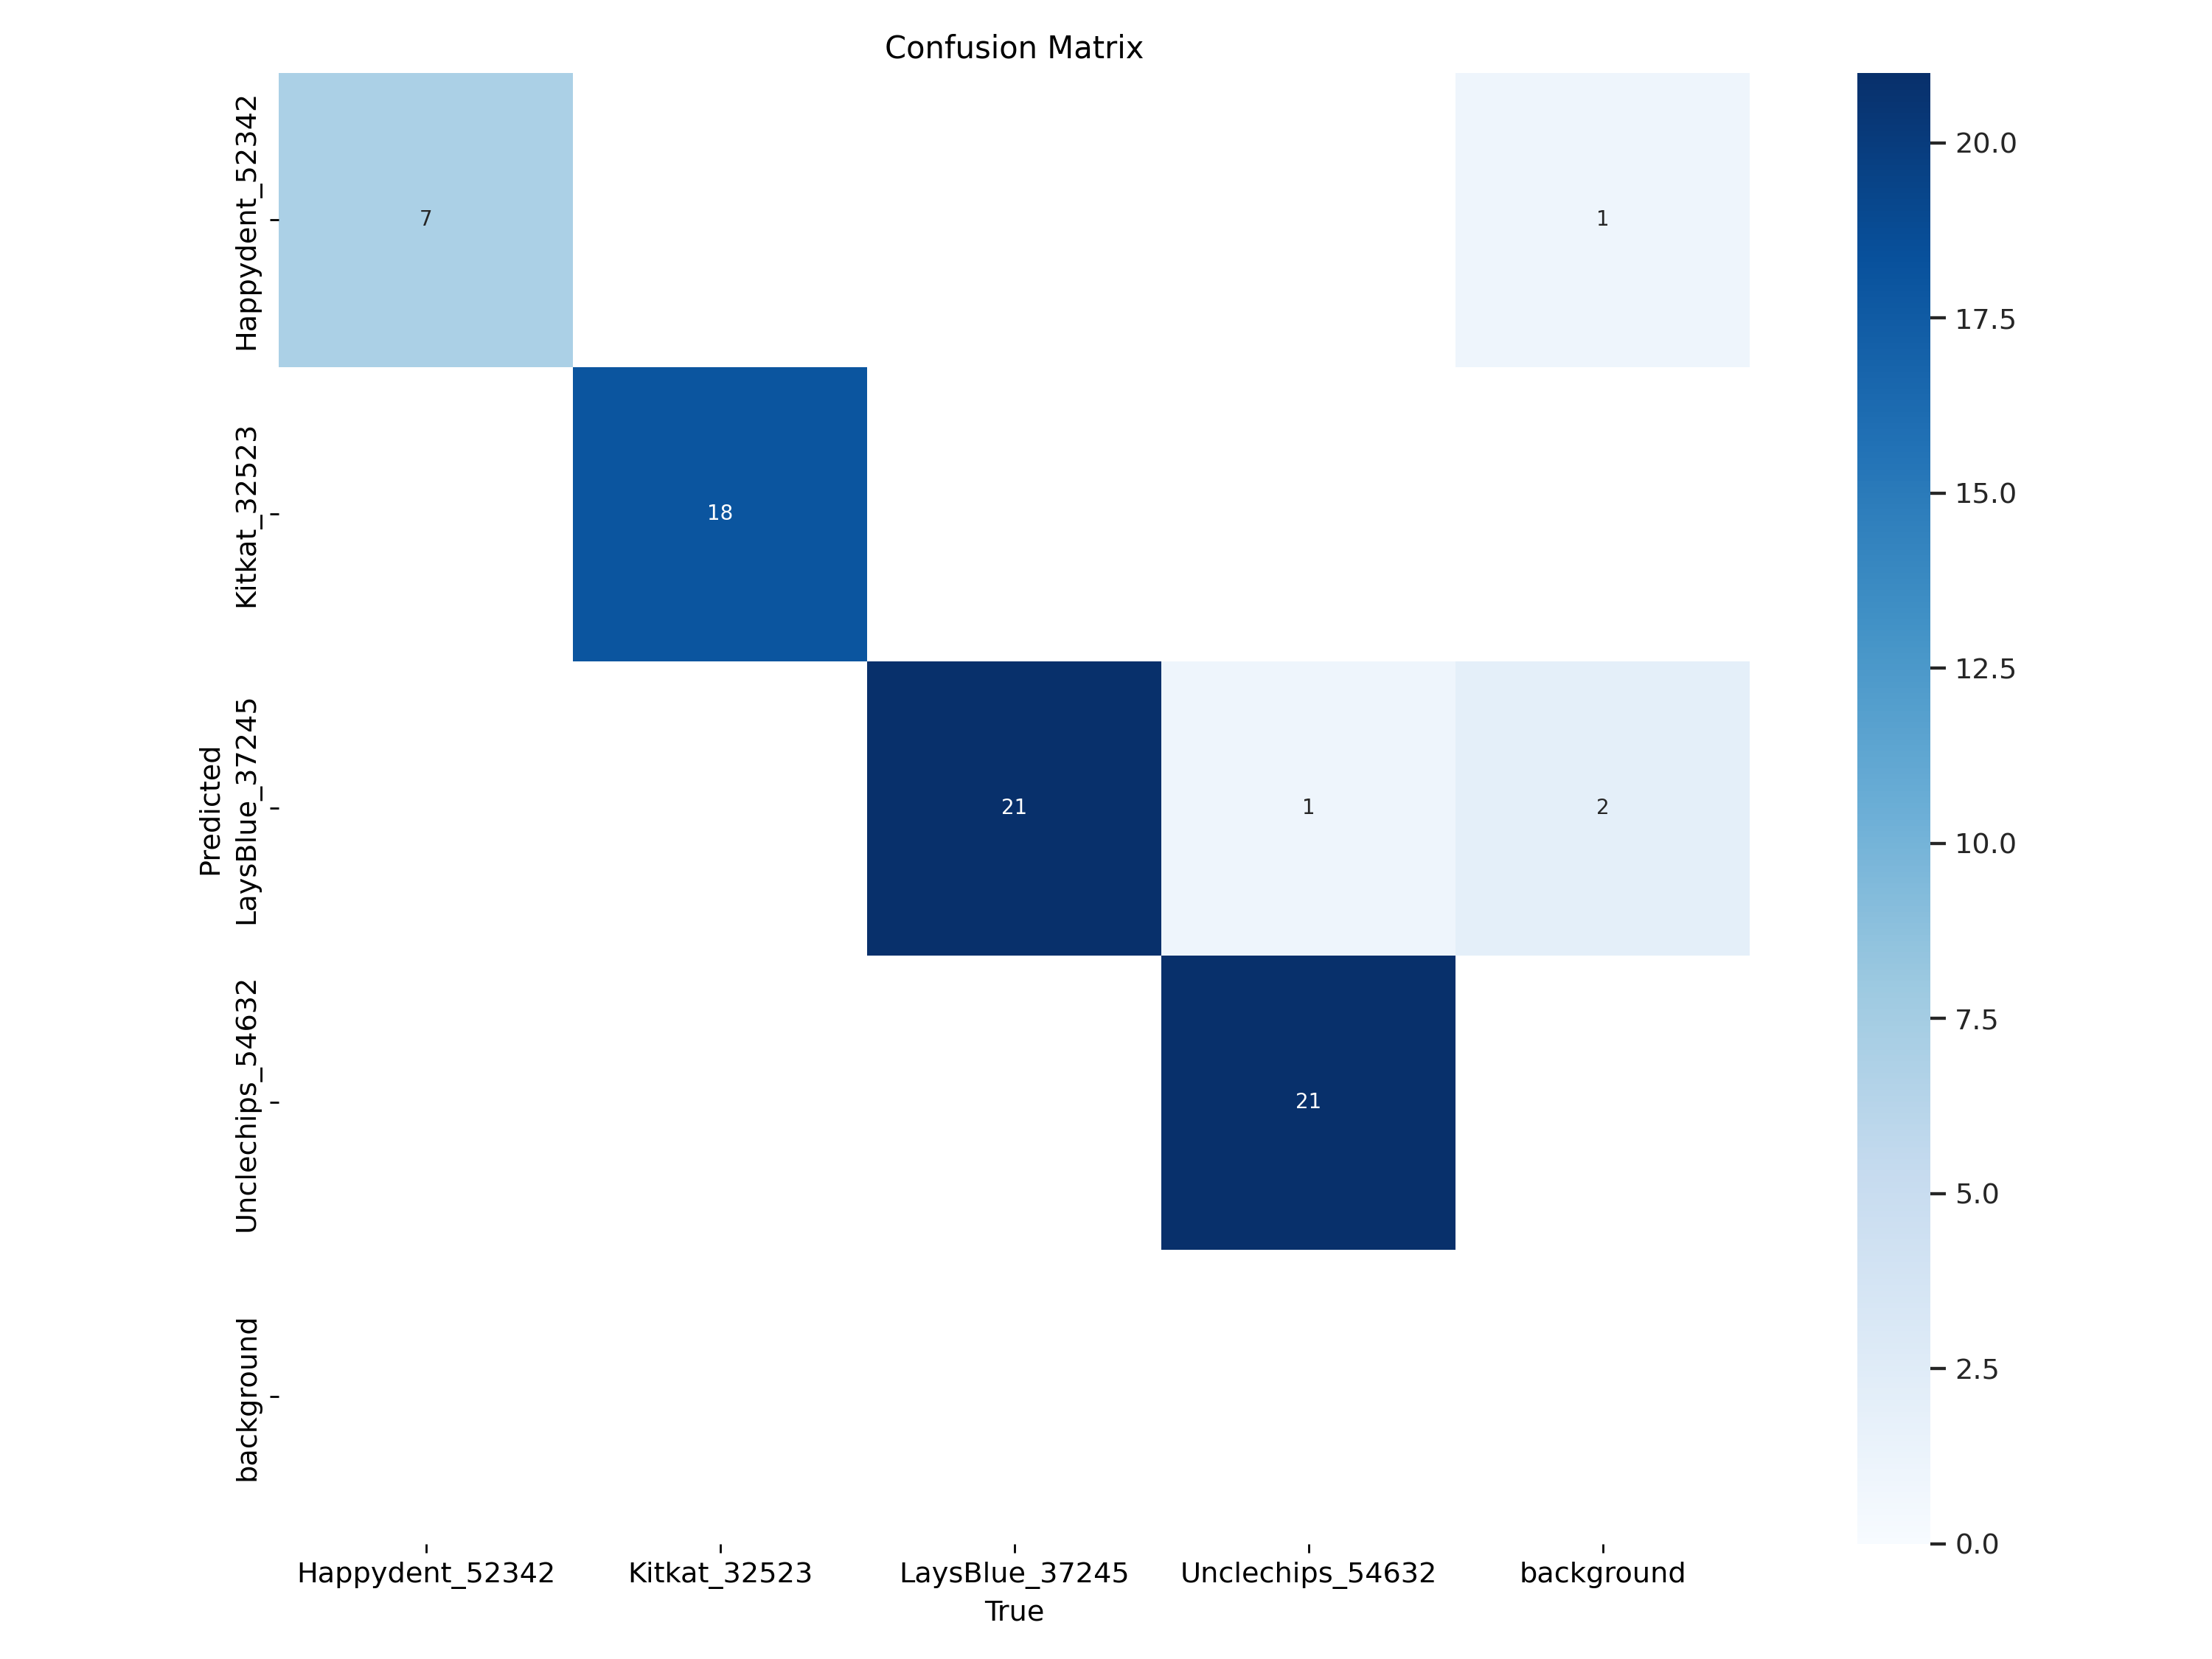

In [ ]:
from PIL import Image
Image.open('/content/runs/detect/train/confusion_matrix.png')

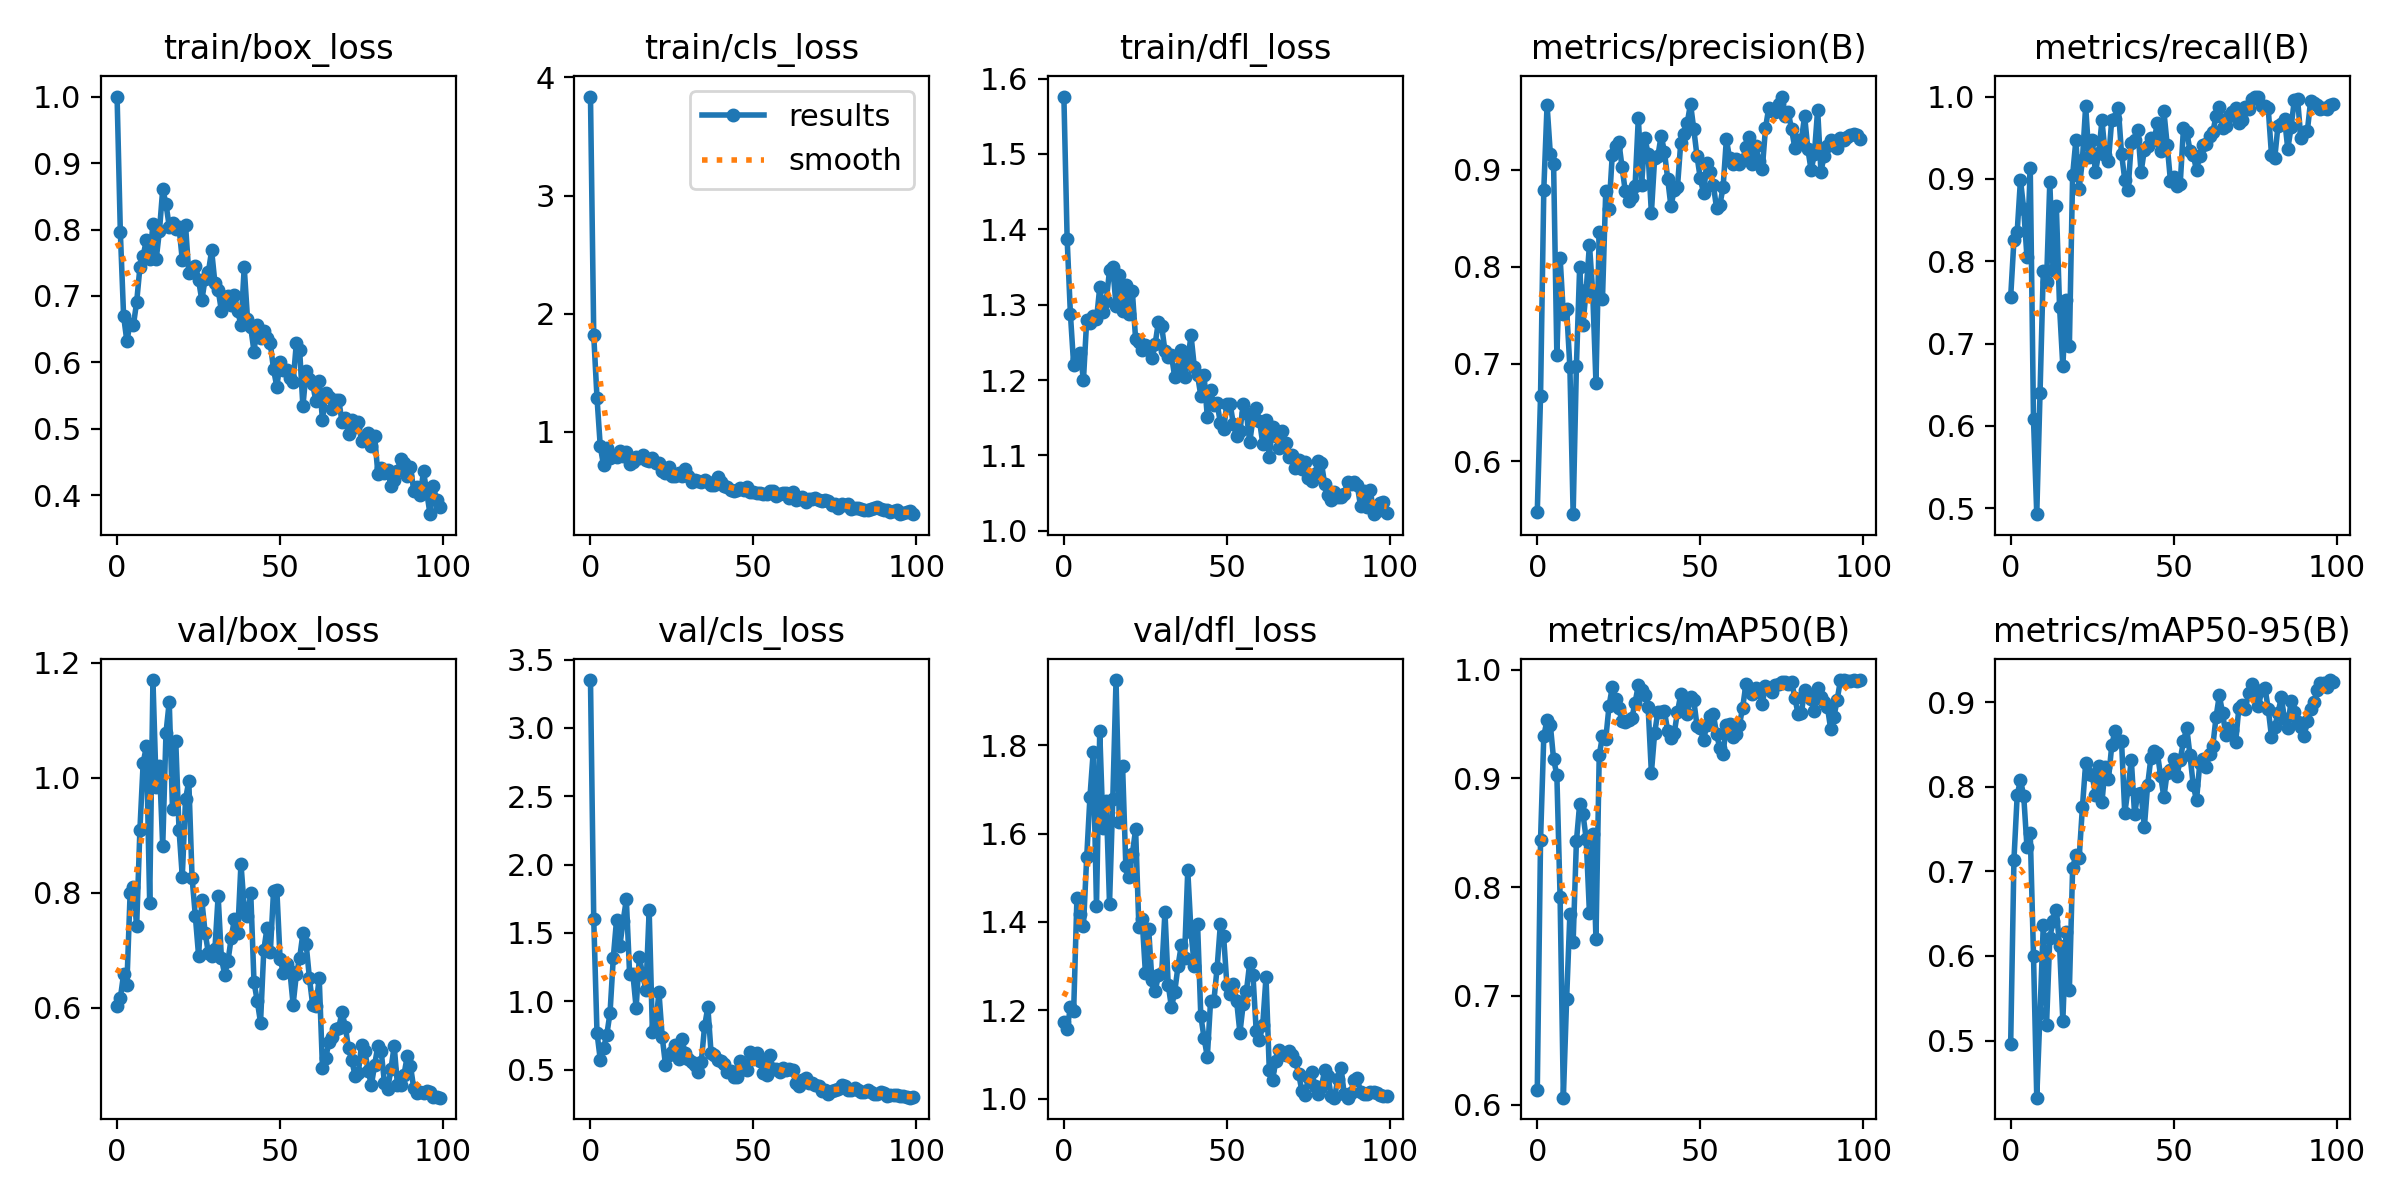

In [ ]:

Image.open('/content/runs/detect/train/results.png')

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/grocery-detection-4/data.yaml

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients
val: Scanning /content/grocery-detection-4/valid/labels.cache... 67 images, 1 backgrounds, 0 corrupt: 100% 67/67 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 58, len(boxes) = 68. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.18it/s]
                   all         67         68      0.936       0.99       0.99      0.925
       Happydent_52342         67          7      0.851          1      0.995      0.977
          Kitkat_32523         67         18      0.937          1      0.987      0.934
        LaysBlue_37245         67         21      0.9

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/grocery-detection-4/test/images

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients

image 1/37 /content/grocery-detection-4/test/images/56JCGcVv14_REWPHbUdzgyXL6NqXql4-CRGj8hL-to-_plaintext_638204571721912808_jpg.rf.3131880bca209dd15d22906af37fd99f.jpg: 640x640 1 Unclechips_54632, 37.8ms
image 2/37 /content/grocery-detection-4/test/images/5nJ7Vnr1RnwMzO2_E4WoHb1bfSdLZwASF9S_GU_pYOM-_plaintext_638204571738974933_jpg.rf.0cad5d3354d60be8d7a2d8aa80c94b96.jpg: 640x640 1 Unclechips_54632, 37.0ms
image 3/37 /content/grocery-detection-4/test/images/AnyConv-com__images-35-_jpg.rf.409f54b3c9aaa6abbbf659183140e39a.jpg: 640x640 1 Unclechips_54632, 32.1ms
image 4/37 /content/grocery-detection-4/test/images/AnyConv-com__images-46-_jpg.rf.32dd0499d7c6af3bb707fabd2f60a335.jpg: 640x640 1 Happydent_52342, 32.1ms
image 5/37 /content/grocery-detection-4/test/images/AnyConv-com__images-49-_jpg.rf.b2da23393b5a5beeaab9fca97875bc17.jpg: 

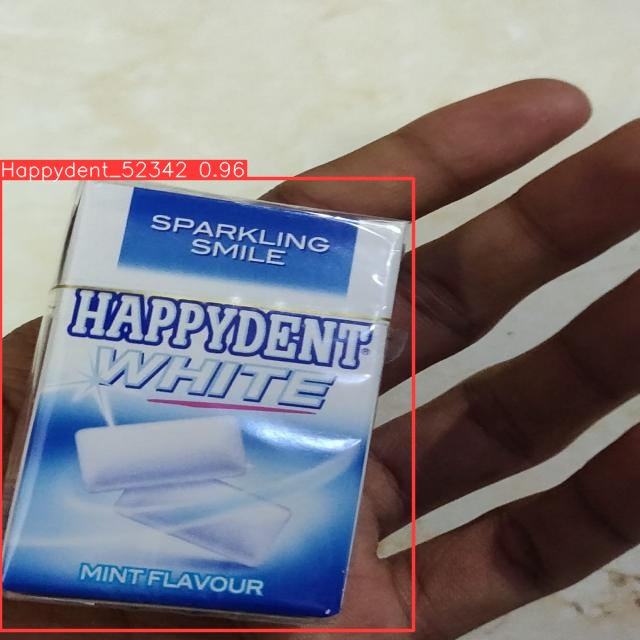

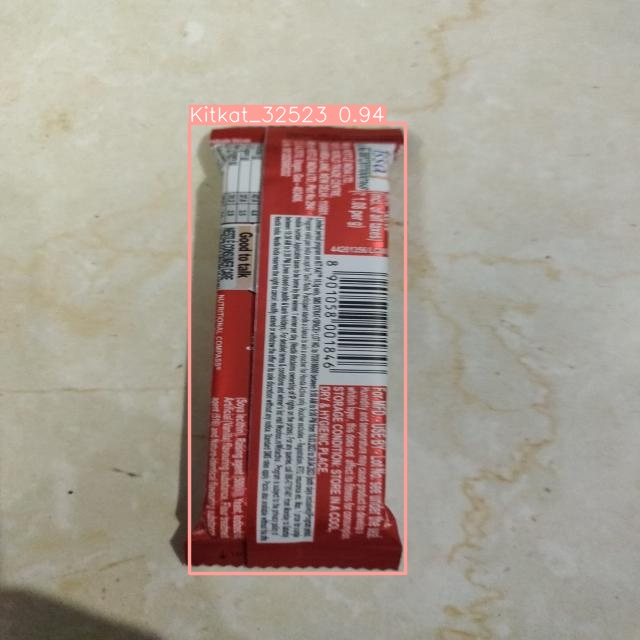

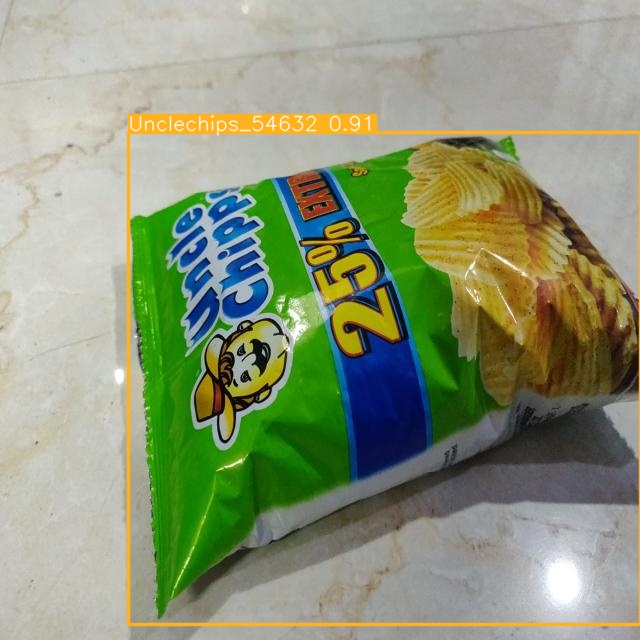

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, height=600))


  print("\n")

#make sure the predict(version) matches as the above command generated predect3 hence here we are using predict3
#why not predict1 and predict2 bcz, predict1 we used for zidane and predict2 is the tree image which didn't work (x png/jpg)